<a href="https://colab.research.google.com/github/domywillygithub/MyProjects/blob/main/Honda_Car_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
The aim of this exploratory data analysis project was to analyze Honda sales data collected across different states in the US. The project faced several challenges, including missing data in the MPG column, Price column being given as an object, and the Mileage column also being given as an object. To solve the missing data in the remaining columns, the missing data was replaced with the mean of the respective column.

Additionally, new groups were created for some columns, such as Drivetrain and Transmission, to classify the data better. The data cleansing process was problematic as the dataset contained several errors, which resulted in the removal of some data. Despite these challenges, the project successfully uncovered valuable insights.

The project highlights the significance of data cleaning and preprocessing, as well as the potential of exploratory data analysis to uncover insights. The Power BI and Tableau reports provides a useful visualizations tools to communicate the findings of the project. Overall, the project provides an excellent example of the power of exploratory data analysis and the importance of ensuring that data is appropriately cleaned and prepared before analysis.You can find the link to Power BI interacting dashboard at the end of this Notebook.

# Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Please download the dataset from [here](https://drive.proton.me/urls/2FZTBBWNFG#6iFWuApxcWrx)

In [ ]:
df = pd.read_excel('/content/honda_sell_data.xlsx')
df

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,â€“,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,Honda,Accord Sport,Used,"$19,999",5.0,3234,White,Black,Front-wheel Drive,...,U20361,64719,4.8,4.8,4.7,4.7,4.8,4.8,NY,Dealer
4995,2020,Honda,Fit LX,Used,"$17,495",4.3,54,Red,Black,Front-wheel Drive,...,36117,40902,4.7,4.6,4.7,4.8,4.5,4.8,NY,Dealer
4996,2018,Honda,Civic Sport,Used,"$19,500",4.3,1925,White Orchid Pearl,Beige,Front-wheel Drive,...,NA073727A,82906,4.7,4.7,4.8,4.8,4.9,4.8,CT,Dealer
4997,2011,Honda,Accord EX-L,Used,"$17,998",4.6,4,Black,Black,Front-wheel Drive,...,22941503,88050,4.4,4.5,4.4,4.6,4.5,4.8,MA,Dealer


What valuable information does the dataset hold

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

The dataset contains 24 columns plus we will need change some datatypes especially for Price and Mileage columns and lastly we will definitely need to figure out which columns are more important to do Exploratory data analysis and the rest of the columns can be dropped but first lets see how many missing values are in each column

In [ ]:
df.isna().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                         0
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color               11
Interior_Color               11
Drivetrain                   11
MPG                        1485
Fuel_Type                    11
Transmission                 11
Engine                       11
VIN                          11
Stock_#                      11
Mileage                      11
Comfort_Rating              552
Interior_Design_Rating      552
Performance_Rating          552
Value_For_Money_Rating      552
Exterior_Styling_Rating     552
Reliability_Rating          552
State                        73
Seller_Type                  73
dtype: int64

more than 30% values are missing in MPG column, we will have to drop it because it's missing a lot of values and we there's no way to replace those missing values, others missing values can also be dropped as they count for less percentage of missing values and the rest of float datatype column we will replace the missing values with their mean. 


Consider the descriptive statistics(mean, count, range, std and median) of each of the numerical columns 

In [ ]:
df.drop('Year', axis=1).describe()

,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4999.000000,4999.000000,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,4.569654,1288.366673,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269
std,0.542453,1969.998095,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886
min,1.200000,0.000000,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,4.400000,126.000000,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000
50%,4.700000,697.000000,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,4.900000,1695.500000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,29258.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Cleansing 

Mileage column is defined as a object datatype and its supposed to be an numerical datatype(int or float) therefore, first step is to replace the strings in it to 0 and then change the column type to float for further analysis

similarly for Price, replace the $ and any othe string to 0 then change the column datatype to float

Transmission column values can be grouped into three systems, Automatic, Manual and Not Specified

and in the similar manner the Drivetrain column values are going to be grouped into four main type as shown below

In [ ]:
df['Mileage'] = df['Mileage'].replace('â€“', '0')
df['Mileage'] = df['Mileage'].replace('USB', '0')
df['Mileage'] = df['Mileage'].replace('Premium', '0')
df['Mileage'] = df['Mileage'].replace('HomeLinkRear', '0')
df['Mileage'] = df['Mileage'].replace('Alloy', '0')
df['Mileage'] = df['Mileage'].replace('BluetoothUSB', '0')
df['Mileage'] = df['Mileage'].replace('Apple', '0')
df['Mileage'] = df['Mileage'].astype(float)
df['Price'] = df['Price'].replace('Not Priced', '$0')
df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '').astype(float)

In [ ]:
def transmission_group(transmission):
    if isinstance(transmission, str):
        if any(x in transmission.lower() for x in ['automatic', 'a/t']):
            return 'Automatic'
        elif any(x in transmission.lower() for x in ['manual', 'm/t']):
            return 'Manual'
        else:
            return 'Not specified'
    else:
        return 'Not specified'

df['Transmission_Group'] = np.vectorize(transmission_group)(df['Transmission'])

In [ ]:
def drivetrain_group(drivetrain):
    if isinstance(drivetrain, str):
        if any(x in drivetrain.lower() for x in ['front-wheel drive', 'fwd']):
            return 'Front-wheel Drive'
        elif any(x in drivetrain.lower() for x in ['all-wheel drive', 'awd']):
            return 'All-wheel Drive'
        elif any(x in drivetrain.lower() for x in ['four-wheel drive']):
            return 'Four-wheel Drive'
        elif any(x in drivetrain.lower() for x in ['rear-wheel drive']):
            return 'Rear-wheel Drive'         
        else:
            return 'Not specified'
    else:
        return 'Not specified'

df['Drivetrain_Group'] = np.vectorize(drivetrain_group)(df['Drivetrain'])

In [ ]:
df['Drivetrain_Group'].value_counts()

Front-wheel Drive    2497
All-wheel Drive      2395
Four-wheel Drive       77
Not specified          16
Rear-wheel Drive       14
Name: Drivetrain_Group, dtype: int64

In [ ]:
df.loc[df['Transmission_Group'] == 'Not specified', 'Transmission'].unique()

array(['continuously variable', 'continuously variable (m cvt)',
       'electronic continuously variable', '1-Speed CVT with Overdrive',
       'Variable', 'â€“', 'OTHER', nan, 'eCVT',
       'continuously variable w/sport mode',
       'continuously variable (ll cvt)', 'NOT SPECIFIED', 'CVT', 2,
       'continuously variable (cvt)',
       'TRANSMISSION W DRIVER SELECTABLE MODE',
       '177.0HP 2.4L 4 Cylinder Engine Gasoline Fuel',
       '166.0HP 2.4L 4 Cylinder Engine Gasoline Fuel',
       '241.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '141.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       'e continuously variable (e cvt)',
       'Continuously Variable Transmission',
       'electric continuously variable', 'CVT TRANSMISSION', '9-Speed',
       '205.0HP 1.5L 4 Cylinder Engine Gasoline Fuel', '1-Speed CVT w/OD'],
      dtype=object)

Dropping of unwanted columns

since MPG already has a lof of missing values then its no surprise than it will be dropped, other columns like Transmission and Drivetrain already used to make new groups as seen above so they are no longer needed, Make column is not needed as this dataset is contains the Honda sales information and other columns are not too important for this Exploratory data analysis task

In [ ]:
df.drop(['MPG', 'Transmission','Drivetrain','Make','Seller_Type','VIN','Stock_#'],axis = 1, inplace=True)

Fill the missing numerical columns with their respectively column's mean value

In [ ]:
df = df.fillna(df.mean())

Confirming if all the numerical missing values were replace by their column's mean and we ni longer have missing values in those columns

In [ ]:
df.isna().sum()

Year                        0
Model                       0
Condition                   0
Price                       0
Consumer_Rating             0
Consumer_Review_#           0
Exterior_Color             11
Interior_Color             11
Fuel_Type                  11
Engine                     11
Mileage                     0
Comfort_Rating              0
Interior_Design_Rating      0
Performance_Rating          0
Value_For_Money_Rating      0
Exterior_Styling_Rating     0
Reliability_Rating          0
State                      73
Transmission_Group          0
Drivetrain_Group            0
dtype: int64

The rest of missing values can be dropped

In [ ]:
df.dropna(inplace=True)
df

,Year,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Fuel_Type,Engine,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Transmission_Group,Drivetrain_Group
0,2023,Ridgeline RTL,New,46370.0,4.8,9,Platinum White Pearl,Beige,Gasoline,3.5L V6 24V GDI SOHC,10.0,5.00000,4.800000,4.800000,4.200000,5.000000,5.000000,CA,Automatic,All-wheel Drive
1,2023,CR-V Hybrid Sport,New,34150.0,1.7,24,Platinum White Pearl,Black,Hybrid,2.0L I4 16V GDI DOHC Hybrid,0.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Automatic,Front-wheel Drive
2,2023,CR-V Hybrid Sport,New,34245.0,4.7,2869,Meteorite Gray Metallic,Black,Hybrid,2.0L I4 16V GDI DOHC Hybrid,1.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Automatic,Front-wheel Drive
3,2022,Pilot TrailSport,New,46500.0,5.0,12,Sonic Gray Pearl,Black,Gasoline,3.5L V6 24V GDI SOHC,5.0,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,CA,Automatic,All-wheel Drive
4,2023,CR-V Hybrid Sport Touring,New,40395.0,4.4,12,Crystal Black Pearl,Black,Hybrid,2.0L I4 16V GDI DOHC Hybrid,5.0,5.00000,3.000000,4.000000,4.000000,5.000000,5.000000,CA,Automatic,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2018,Accord Sport,Used,19999.0,5.0,3234,White,Black,Gasoline,1.5L I4 16V GDI DOHC Turbo,64719.0,4.80000,4.800000,4.700000,4.700000,4.800000,4.800000,NY,Automatic,Front-wheel Drive
4995,2020,Fit LX,Used,17495.0,4.3,54,Red,Black,Gasoline,1.5L I4 16V GDI DOHC,40902.0,4.70000,4.600000,4.700000,4.800000,4.500000,4.800000,NY,Automatic,Front-wheel Drive
4996,2018,Civic Sport,Used,19500.0,4.3,1925,White Orchid Pearl,Beige,Gasoline,1.5L I4 16V GDI DOHC Turbo,82906.0,4.70000,4.700000,4.800000,4.800000,4.900000,4.800000,CT,Manual,Front-wheel Drive
4997,2011,Accord EX-L,Used,17998.0,4.6,4,Black,Black,Gasoline,3.5L V6 24V MPFI SOHC,88050.0,4.40000,4.500000,4.400000,4.600000,4.500000,4.800000,MA,Automatic,Front-wheel Drive


There it is, we no longer have any missing values and the dataframe is ready is for the task ahead

In [ ]:
df.isna().sum()

Year                       0
Model                      0
Condition                  0
Price                      0
Consumer_Rating            0
Consumer_Review_#          0
Exterior_Color             0
Interior_Color             0
Fuel_Type                  0
Engine                     0
Mileage                    0
Comfort_Rating             0
Interior_Design_Rating     0
Performance_Rating         0
Value_For_Money_Rating     0
Exterior_Styling_Rating    0
Reliability_Rating         0
State                      0
Transmission_Group         0
Drivetrain_Group           0
dtype: int64

The new descriptive statistics including Price and Mileage

In [ ]:
df.drop('Year',axis=1).describe()

,Price,Consumer_Rating,Consumer_Review_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000
mean,33593.608404,4.575741,1189.800041,22718.713358,4.819811,4.707732,4.665223,4.580574,4.732884,4.867631
std,10667.626783,0.542716,1727.801953,36756.614948,0.244486,0.452802,0.333298,0.353097,0.296824,0.180386
min,0.000000,1.200000,0.000000,0.000000,3.800000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,26998.000000,4.500000,124.000000,4.000000,4.800000,4.700000,4.500000,4.300000,4.700000,4.800000
50%,33990.000000,4.700000,671.000000,15.000000,4.900000,4.800000,4.700000,4.600000,4.800000,4.900000
75%,41855.000000,4.900000,1664.000000,34708.500000,5.000000,5.000000,5.000000,4.900000,5.000000,5.000000
max,69980.000000,5.000000,29258.000000,259029.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['Mileage'].median()

15.0

In [ ]:
df['Price'].mode()

0    41770.0
Name: Price, dtype: float64

In [ ]:
len(df[df['Price']== 41770.0])

70

In [ ]:
df['Reliability_Rating'].mean()

4.867631291666245

# EXPLORATORY DATA ANALYSIS (EDA)

# Sales Analysis

In [ ]:
print('Total Revenue generated across all states: ',df['Price'].sum())
print('Total cars sold: ', df['Price'].count())
print('Average Revenue generated across all states: ', df['Price'].mean())

Total Revenue generated across all states:  165482115.0
Total cars sold:  4926
Average Revenue generated across all states:  33593.6084043849


In [ ]:
x = df.groupby('Year')['Price'].sum().sort_values(ascending=False)[:5]
print('Top 5 best selling Years: \n',x)

Top 5 best selling Years: 
 Year
2023    62001394.0
2022    55253096.0
2021    11240529.0
2019    11051929.0
2020    10527523.0
Name: Price, dtype: float64


In [ ]:
n=df.groupby('Year')['Price'].count().sort_values(ascending=False)[:5]
print('Top 5 Years with Highest number of cars sold: \n',n)

Top 5 Years with Highest number of cars sold: 
 Year
2023    1582
2022    1458
2019     392
2020     349
2021     336
Name: Price, dtype: int64


Top 3 of the most expensive car sold

In [ ]:
df[['Year','Model','Condition','Price','Drivetrain_Group','Engine','Mileage','State','Transmission_Group']].sort_values(by='Price', ascending=False)[:3].set_index('Year')

,Model,Condition,Price,Drivetrain_Group,Engine,Mileage,State,Transmission_Group
Year,,,,,,,,
2021,Civic Type R Limited Edition,Used,69980.0,Front-wheel Drive,4 Cylinder Engine,700.0,FL,Manual
2021,Civic Type R Limited Edition,Used,59847.0,Front-wheel Drive,2.0L I4 16V GDI DOHC Turbo,3562.0,CO,Manual
2023,Pilot Elite,New,56830.0,All-wheel Drive,3.5L V6 24V GDI DOHC,0.0,MD,Automatic


In [ ]:
m=df.groupby('Model')['Price'].sum().sort_values(ascending=False)[:5]
print('Top 5 best selling Models: \n',m)

Top 5 best selling Models: 
 Model
Pilot Sport                  9018371.0
CR-V EX-L                    8645029.0
CR-V Hybrid Sport Touring    7468160.0
Pilot TrailSport             6984735.0
Pilot EX-L                   6938632.0
Name: Price, dtype: float64


In [ ]:
m=df.groupby('Model')['Price'].count().sort_values(ascending=False)[:5]
print('Top 5 most selling Models: \n',m)

Top 5 most selling Models: 
 Model
CR-V EX-L                    261
Pilot Sport                  228
Pilot EX-L                   200
Accord Sport 1.5T            194
CR-V Hybrid Sport Touring    185
Name: Price, dtype: int64


In [ ]:
print('Top 5 States with the most number of cars sold: \n',df.groupby('State')['Price'].count().sort_values(ascending=False)[:5])

Top 5 States with the most number of cars sold: 
 State
CA    330
IL    329
FL    323
TX    295
OH    268
Name: Price, dtype: int64


In [ ]:
t=df[df['Year'] == 2023].groupby('State')['Price'].mean().sort_values(ascending=False)[:10]
print('Top 10 States with highest average Sales in 2023: \n',t)

Top 10 States with highest average Sales in 2023: 
 State
WV    49855.666667
UT    48888.333333
WY    48359.000000
NM    44888.000000
AL    43930.000000
ND    43669.000000
DE    43212.000000
ME    42501.250000
CO    42499.185185
NJ    42487.095890
Name: Price, dtype: float64


Gross sales per condition of the car

In [ ]:
New_Price=df.loc[(df['Condition'] == 'New') & (df['Year'] == 2023)]
Used_Price=df.loc[(df['Condition'] == 'Used') & (df['Year'] == 2023)]
HC_Price=df.loc[(df['Condition'] == 'Honda Certified') & (df['Year'] == 2023)]
Gross_Sales_perNew_Vehicle = New_Price['Price'].sum()/len(New_Price)
Gross_Sales_perUsed_Vehicle = Used_Price['Price'].sum()/len(Used_Price)
Gross_Sales_perHC_Vehicle = HC_Price['Price'].sum()/len(HC_Price)
print('Gross Sales per New car sold in 2023: ',Gross_Sales_perNew_Vehicle )
print('Gross Sales per Used car sold in 2023: ',Gross_Sales_perUsed_Vehicle )
print('Gross Sales per Honda Certified car sold in 2023: ',Gross_Sales_perHC_Vehicle )

Gross Sales per New car sold in 2023:  39178.711636828644
Gross Sales per Used car sold in 2023:  38748.846153846156
Gross Sales per Honda Certified car sold in 2023:  44430.8


Total sales generated based on Car Transmission system

In [ ]:
df.groupby('Transmission_Group').agg({'Price': ['sum', 'count']}).sort_values(('Price','sum'), ascending=False)

Price      
                            sum count
Transmission_Group                   
Automatic           151046483.0  4449
Not specified         8264184.0   260
Manual                6171448.0   217

Total Sales generated based on the condition of the car

In [ ]:
df.groupby('Condition').agg({'Price': ['sum', 'count']}).sort_values(('Price','sum'), ascending=False)

Price      
                         sum count
Condition                         
New              105051066.0  2690
Used              51303975.0  1956
Honda Certified    9127074.0   280

Top 10 States with the highest number of cars sold per year

In [ ]:
df[df['Year'] == 2023].groupby('State')['Price'].count().sort_values(ascending=False)[:10]

State
CA    131
IL    123
TX    109
OH     93
FL     88
IN     77
NJ     73
NC     66
VA     63
GA     55
Name: Price, dtype: int64

# Models Analysis

Top 10 Most sold Model in each state

In [ ]:
df.groupby(['State','Model'])['Model'].count().sort_values(ascending=False)[:10]

State  Model            
IL     Accord Sport 1.5T    23
CA     Pilot Sport          20
OH     CR-V EX-L            20
FL     Civic Si Base        19
CA     CR-V EX-L            18
IL     Pilot Sport          17
       Pilot EX-L           17
CA     Pilot EX-L           16
IL     Civic Sport          16
       Pilot TrailSport     16
Name: Model, dtype: int64

Top 3 best Consumer rated and Performance rated Models

In [ ]:
df.groupby('Model').agg({'Price':['sum','count'],'Consumer_Rating':'mean', 'Performance_Rating':'mean'}).sort_values(('Price','sum'),ascending=False)[:3]

Price       Consumer_Rating Performance_Rating
                                 sum count            mean               mean
Model                                                                        
Pilot Sport                9018371.0   228        4.524561           4.970520
CR-V EX-L                  8645029.0   261        4.565517           4.890805
CR-V Hybrid Sport Touring  7468160.0   185        4.502703           4.000000

Arranging the Models based on the consumer rating to see which Model has the lowest rating

In [ ]:
df.groupby(['Model']).agg({'Consumer_Rating':['count', 'mean'],'Consumer_Review_#': 'sum'}).sort_values([('Consumer_Rating','count'),('Consumer_Rating','mean')],ascending=[False,False]).reset_index()

Model Consumer_Rating            \
                                                 count      mean   
0                            CR-V EX-L             261  4.565517   
1                          Pilot Sport             228  4.524561   
2                           Pilot EX-L             200  4.640000   
3                    Accord Sport 1.5T             194  4.590206   
4            CR-V Hybrid Sport Touring             185  4.502703   
..                                 ...             ...       ...   
141                           Civic GX               1  4.400000   
142                          Accord VP               1  4.200000   
143                       CR-Z 3dr CVT               1  4.200000   
144                        Civic Si SI               1  4.200000   
145  Civic Hybrid Base w/Leather (CVT)               1  2.900000   

    Consumer_Review_#  
                  sum  
0              313086  
1              247701  
2              264158  
3              227815  
4              258188  
..                ...  
141                42  
142                40  
143                69  
144              1578  
145               113  

[146 rows x 4 columns]

The *Civic Hybrid Base w/Leather (CVT)* model has the lowest rating and we need to further investigate on why it's the lowest rating

In [ ]:
df[df['Model']== 'Civic Hybrid Base w/Leather (CVT)']

,Year,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Fuel_Type,Engine,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Transmission_Group,Drivetrain_Group
4299,2013,Civic Hybrid Base w/Leather (CVT),Used,10456.0,2.9,113,Alabaster Silver Metallic,Gray,Hybrid,1.5L I4 8V MPFI SOHC Hybrid,116826.0,4.1,4.2,3.8,3.8,4.3,4.2,CA,Automatic,Front-wheel Drive


upon further investigation its clear that the model was sold as a used car so it's probably has a lot of defects that led to its lowest rating

With the physical appearance of the car, the following Models have been rated by consumers to be the best in terms of their Exterior colors

In [ ]:
df.groupby(['Model','Exterior_Color']).agg({'Price':'min','Consumer_Rating': ['mean', 'count'], 'Consumer_Review_#': 'sum'}).sort_values(('Consumer_Rating', 'mean'),ascending=False).loc[lambda x: x[('Consumer_Rating', 'count')]>10][:20]

Price Consumer_Rating  \
                                                       min            mean   
Model                     Exterior_Color                                     
Passport TrailSport       Sonic Gray Pearl         39900.0        4.864706   
Odyssey EX-L              Platinum White Pearl     30562.0        4.842105   
Accord Hybrid Sport       Still Night Pearl        30560.0        4.826667   
Accord Sport 2.0T         Platinum White Pearl     31987.0        4.813333   
Ridgeline RTL             Crystal Black Pearl      21817.0        4.788235   
Pilot EX-L                Platinum White Pearl     27859.0        4.776471   
Odyssey Elite             Modern Steel Metallic        0.0        4.773333   
CR-V EX                   Platinum White Pearl     29485.0        4.771429   
CR-V Hybrid Sport Touring Urban Gray Pearl         40240.0        4.770588   
Ridgeline RTL             Platinum White Pearl     38997.0        4.769231   
Civic Sport               Platinum White Pearl     22999.0        4.768750   
Passport Elite            Sonic Gray Pearl         42592.0        4.761538   
Ridgeline RTL-E           Modern Steel Metallic        0.0        4.750000   
Ridgeline RTL             Radiant Red Metallic II  38718.0        4.735714   
Ridgeline Black Edition   Sonic Gray Pearl         45997.0        4.733333   
CR-V EX                   Radiant Red Metallic     30985.0        4.731250   
CR-V EX-L                 White                     9995.0        4.718182   
Pilot EX-L                Modern Steel Metallic    20885.0        4.715000   
Ridgeline Black Edition   Platinum White Pearl         0.0        4.713636   
Pilot Special Edition     Lunar Silver Metallic    35835.0        4.709091   

                                                        Consumer_Review_#  
                                                  count               sum  
Model                     Exterior_Color                                   
Passport TrailSport       Sonic Gray Pearl           17             18272  
Odyssey EX-L              Platinum White Pearl       19             28628  
Accord Hybrid Sport       Still Night Pearl          15             23290  
Accord Sport 2.0T         Platinum White Pearl       15             20633  
Ridgeline RTL             Crystal Black Pearl        17             26573  
Pilot EX-L                Platinum White Pearl       51             71626  
Odyssey Elite             Modern Steel Metallic      15             25684  
CR-V EX                   Platinum White Pearl       28             35621  
CR-V Hybrid Sport Touring Urban Gray Pearl           17             28312  
Ridgeline RTL             Platinum White Pearl       13             11342  
Civic Sport               Platinum White Pearl       16             23536  
Passport Elite            Sonic Gray Pearl           13             19922  
Ridgeline RTL-E           Modern Steel Metallic      14             24061  
Ridgeline RTL             Radiant Red Metallic II    14             13829  
Ridgeline Black Edition   Sonic Gray Pearl           12             22227  
CR-V EX                   Radiant Red Metallic       16             29249  
CR-V EX-L                 White                      11             10753  
Pilot EX-L                Modern Steel Metallic      20             67927  
Ridgeline Black Edition   Platinum White Pearl       22             45764  
Pilot Special Edition     Lunar Silver Metallic      22             18545

Here are the links to images of top 5 Models

[1. Passport TrailSport	Sonic Gray Pearl](https://www.google.com/search?q=honda+passport+trailsport+sonic+gray+pearl&hl=en&sxsrf=APwXEde89FkDlFxk35FLMR-7E3d7dxXOLw:1683392390767&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjjgOCrleH-AhXR6CoKHVetC0YQ_AUoAXoECAEQAw&cshid=1683392394910439&biw=1517&bih=730&dpr=0.9)

[2. Odyssey EX-L Platinum White Pearl](https://www.google.com/search?q=honda+Odyssey+EX-L+Platinum+White+Pearl&sxsrf=APwXEdeut0xy3myIVbhfzX7oDedJ84JrLw:1683392586536&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjR-IyJluH-AhUm_CoKHdLDAfQQ_AUoAXoECAEQAw&biw=1517&bih=730&dpr=0.9)

[3. Accord Hybrid Sport	Still Night Pearl](https://www.google.com/search?q=honda+Accord+Hybrid+Sport+Still+Night+Pearl&tbm=isch&ved=2ahUKEwiE27yLluH-AhWFyCoKHfDQAQMQ2-cCegQIABAA&oq=honda+Accord+Hybrid+Sport+Still+Night+Pearl&gs_lcp=CgNpbWcQAzoECCMQJ1DUE1jGNGCdO2gAcAB4AIABWogB2wKSAQE0mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=T4hWZMT3HoWRqwHwoYcY&bih=730&biw=1517)

[4. Accord Sport 2.0T Platinum White Pearl](https://www.google.com/search?q=honda+Accord+Sport+2.0T+Platinum+White+Pearl&tbm=isch&ved=2ahUKEwjT0uu-luH-AhWYxyoKHQzkAScQ2-cCegQIABAA&oq=honda+Accord+Sport+2.0T+Platinum+White+Pearl&gs_lcp=CgNpbWcQAzoECCMQJ1DdIVjwYGCQaWgCcAB4AIABiQGIAagEkgEDNS4xmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=u4hWZJOJDpiPqwGMyIe4Ag&bih=730&biw=1517)

[5. Ridgeline RTL	Crystal Black Pearl](https://www.google.com/search?q=honda+Ridgeline+RTL+Crystal+Black+Pearl&tbm=isch&ved=2ahUKEwj0xZPsluH-AhVBxCoKHW6MBB4Q2-cCegQIABAA&oq=honda+Ridgeline+RTL+Crystal+Black+Pearl&gs_lcp=CgNpbWcQAzoECCMQJzoFCAAQgARQiAVYhD5gsUNoAHAAeACAAW-IAesbkgEEMzcuNZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=GolWZPTQD8GIqwHumJLwAQ&bih=730&biw=1517)

Top Models with the highest Exterior_styling rating

dont confuse with the above, this one is how model was evaluated based on its exterior color while the above rating is for model with the best color based on consumer rating

In [ ]:
df.groupby('Model').agg({'Exterior_Styling_Rating': ['mean','count']}).sort_values(('Exterior_Styling_Rating','mean'),ascending=False).loc[lambda x: x[('Exterior_Styling_Rating','count')]>10]

Exterior_Styling_Rating      
                                             mean count
Model                                                  
CR-V Hybrid Sport                        5.000000    55
CR-V Hybrid Sport Touring                5.000000   185
Accord Sport 1.5T                        4.990722   194
Accord Sport 2.0T                        4.979710    69
Accord Sport SE                          4.978378    37
...                                           ...   ...
CR-V EX                                  4.330286   175
Odyssey Elite                            4.280734   109
Odyssey Touring                          4.228409    88
CR-V EX-L                                4.219540   261
Odyssey Sport                            4.000000    46

[67 rows x 2 columns]

you can view top 3 Models by following the link below

1. [CR-V Hybrid Sport](https://www.google.com/search?q=honda+CR-V+Hybrid+Sport&tbm=isch&ved=2ahUKEwiPjuezl-H-AhWMwyoKHZC-BSsQ2-cCegQIABAA&oq=honda+CR-V+Hybrid+Sport&gs_lcp=CgNpbWcQAzIECAAQHjIGCAAQCBAeMgYIABAIEB4yBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQ6BAgjECc6BQgAEIAEUM4fWPkoYNYzaABwAHgAgAFmiAGZApIBAzEuMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=sIlWZI_2H4yHqwGQ_ZbYAg&bih=730&biw=1517)

2. [CR-V Hybrid Sport Touring](https://www.google.com/search?q=honda+CR-V+Hybrid+Sport+Touring&tbm=isch&ved=2ahUKEwixpM3DmuH-AhWLsioKHTZ-BXAQ2-cCegQIABAA&oq=honda+CR-V+Hybrid+Sport+Touring&gs_lcp=CgNpbWcQAzIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDoECAAQHjoGCAAQCBAeUM4TWM4TYIgcaABwAHgAgAFciAGyAZIBATKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=9oxWZLHROovlqgG2_JWABw&bih=730&biw=1517)

3. [Accord Sport 1.5T](https://www.google.com/search?q=honda+Accord+Sport+1.5T&tbm=isch&ved=2ahUKEwiT9_-Tm-H-AhWOuioKHZyvBLsQ2-cCegQIABAA&oq=honda+Accord+Sport+1.5T&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjoECCMQJzoHCAAQGBCABFDMFFjMFGDgHGgAcAB4AIABWYgBsQGSAQEymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=n41WZNOrIo71qgGc35LYCw&bih=730&biw=1517)

Models with the Highest Value for money rating

In [ ]:
df.groupby('Model').agg({'Price':'mean','Value_For_Money_Rating':['mean', 'count']}).sort_values(('Value_For_Money_Rating','mean'),ascending=False).loc[lambda x: x[('Value_For_Money_Rating','count')]>10]

Price Value_For_Money_Rating      
                                   mean                   mean count
Model                                                               
Accord Sport 1.5T          29465.417526               4.981443   194
Accord Sport SE            30675.567568               4.972973    37
Accord Sport 2.0T          33822.014493               4.963768    69
Pilot Sport                39554.258772               4.963244   228
Pilot Special Edition      42442.911765               4.958088   136
...                                 ...                    ...   ...
Odyssey Elite              44020.541284               4.165138   109
Odyssey Touring            40454.000000               4.157955    88
CR-V Hybrid Sport          34530.472727               4.000000    55
CR-V Hybrid Sport Touring  40368.432432               4.000000   185
Odyssey Sport              43044.130435               4.000000    46

[67 rows x 3 columns]

The [Accord Sport 1.5T](https://www.google.com/search?q=honda+Accord+Sport+1.5T&tbm=isch&ved=2ahUKEwiT9_-Tm-H-AhWOuioKHZyvBLsQ2-cCegQIABAA&oq=honda+Accord+Sport+1.5T&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAUQHjoECCMQJzoHCAAQGBCABFDMFFjMFGDgHGgAcAB4AIABWYgBsQGSAQEymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=n41WZNOrIo71qgGc35LYCw&bih=730&biw=1517) is the top rated value for money car

Models with the best Reliability ratings

In [ ]:
df.groupby('Model').agg({'Reliability_Rating': ['mean','count']}).sort_values(('Reliability_Rating','mean'),ascending=False).loc[lambda x: x[('Reliability_Rating','count')]>10]

Reliability_Rating      
                                        mean count
Model                                             
CR-V Hybrid Sport                   5.000000    55
CR-V Hybrid Sport Touring           5.000000   185
Odyssey Sport                       5.000000    46
Accord Hybrid Sport                 4.998663   100
Pilot Sport                         4.988269   228
...                                      ...   ...
Accord Hybrid EX-L                  4.687500    16
Odyssey EX                          4.591667    24
Pilot EX                            4.578125    32
HR-V EX                             4.551351    37
Pilot LX                            4.545455    11

[67 rows x 2 columns]

Here are the most Reliable Models

1. [CR-V Hybrid Sport](https://www.google.com/search?q=honda+CR-V+Hybrid+Sport&tbm=isch&ved=2ahUKEwiPjuezl-H-AhWMwyoKHZC-BSsQ2-cCegQIABAA&oq=honda+CR-V+Hybrid+Sport&gs_lcp=CgNpbWcQAzIECAAQHjIGCAAQCBAeMgYIABAIEB4yBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQyBwgAEBgQgAQ6BAgjECc6BQgAEIAEUM4fWPkoYNYzaABwAHgAgAFmiAGZApIBAzEuMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=sIlWZI_2H4yHqwGQ_ZbYAg&bih=730&biw=1517)

2. [CR-V Hybrid Sport Touring](https://www.google.com/search?q=honda+CR-V+Hybrid+Sport+Touring&tbm=isch&ved=2ahUKEwixpM3DmuH-AhWLsioKHTZ-BXAQ2-cCegQIABAA&oq=honda+CR-V+Hybrid+Sport+Touring&gs_lcp=CgNpbWcQAzIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDIHCAAQGBCABDoECAAQHjoGCAAQCBAeUM4TWM4TYIgcaABwAHgAgAFciAGyAZIBATKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=9oxWZLHROovlqgG2_JWABw&bih=730&biw=1517)

3. [Odyssey Sport](https://www.google.com/search?q=honda+Odyssey+Sport&tbm=isch&ved=2ahUKEwiIzNG9m-H-AhUTwioKHaHdAjkQ2-cCegQIABAA&oq=honda+Odyssey+Sport&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQBRAeMgYIABAFEB4yBggAEAgQHjIGCAAQCBAeMgcIABAYEIAEMgcIABAYEIAEMgcIABAYEIAEOgYIABAHEB5QnxRYnxRgwyRoAHAAeACAAVuIAbUBkgEBMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=9o1WZIj5NZOEqwGhu4vIAw&bih=730&biw=1517)

Top models based on Comfort ratings

In [ ]:
df.groupby('Model').agg({'Comfort_Rating': ['mean','count']}).sort_values(('Comfort_Rating','mean'),ascending=False).loc[lambda x: x[('Comfort_Rating','count')]>10]

Comfort_Rating      
                                    mean count
Model                                         
CR-V Hybrid Sport Touring       5.000000   185
CR-V Hybrid Sport               5.000000    55
Odyssey Sport                   5.000000    46
Pilot Special Edition           4.986029   136
Accord Sport 1.5T               4.984021   194
...                                  ...   ...
Civic LX                        4.562637    91
HR-V EX                         4.340541    37
HR-V LX                         4.266000    50
HR-V EX-L                       4.002083    48
HR-V Sport                      4.001220    82

[67 rows x 2 columns]

The best Three comfortable Models are also the best Reliable models from above

Drivetrains with the best Performance ratings

In [ ]:
df.groupby('Drivetrain_Group').agg({'Performance_Rating':['mean','count'], 'Price': 'sum'}).sort_values(('Performance_Rating','mean'),ascending=False).loc[lambda x: x[('Performance_Rating', 'count')]>10]

Performance_Rating             Price
                                mean count         sum
Drivetrain_Group                                      
Rear-wheel Drive            4.815385    13    391974.0
All-wheel Drive             4.707335  2386  92625099.0
Front-wheel Drive           4.629032  2451  71287491.0
Four-wheel Drive            4.474648    71    988546.0

The cars with Rear-wheel Drive* has the best performance rating, there's an aterisk next to it because it has few number of cars (count), had it have more count then the mean will fall around the true value according to Law of Large numbers

Used to New Vehicle Sale Ratio

If used vehicle sales are equal to or higher than new vehicle sales, this can be an indicator of a strong used vehicle department.

In [ ]:
Used_to_New_sales_Ratio = len(df[df['Condition'] == 'Used'])/len(df[df['Condition'] == 'New'])
print('Used car to New car sales Ratio :',Used_to_New_sales_Ratio)

Used car to New car sales Ratio : 0.7271375464684015


The Models with new condition sold more than the Used ones

# Visualizations

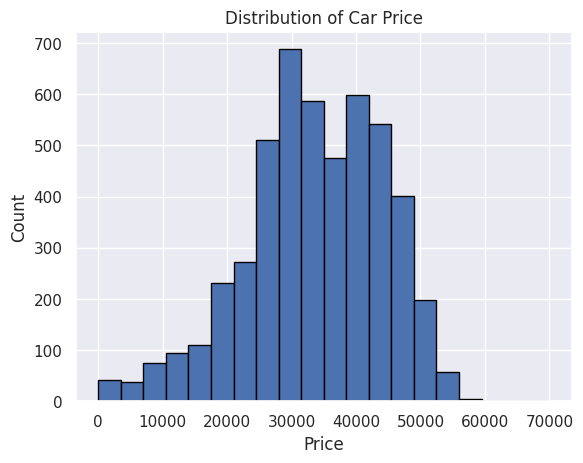

In [ ]:
plt.hist(df['Price'], ec = 'black',bins=20)
plt.title('Distribution of Car Price')
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

The biggested intake here is that, majority of cars are sold between  20,000 and 50,000

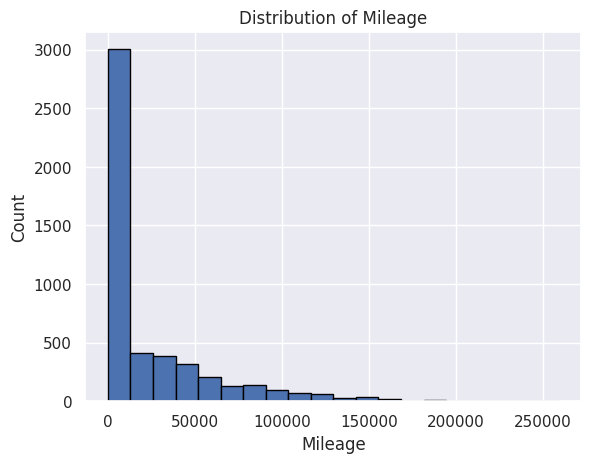

In [ ]:
plt.hist(df['Mileage'], ec='black',bins=20)
plt.title('Distribution of Mileage')
plt.ylabel('Count')
plt.xlabel('Mileage')
plt.show()

Since there is high count on the low Mileage then its clear that most of the car sold were new with low mileage numbers

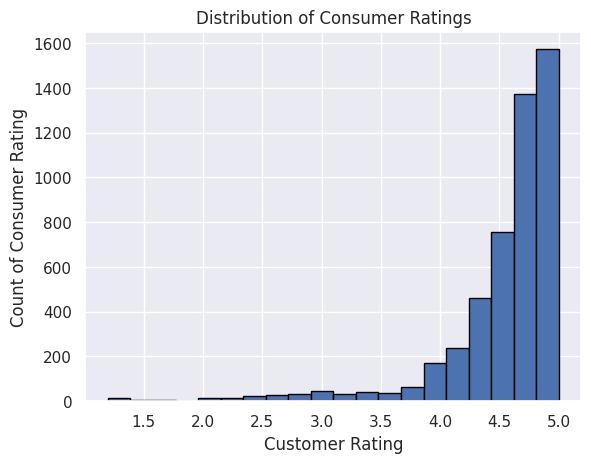

In [ ]:
plt.hist(df['Consumer_Rating'], ec = 'black', bins=20)
plt.title('Distribution of Consumer Ratings')
plt.ylabel('Count of Consumer Rating')
plt.xlabel('Customer Rating')
plt.show()

The overall consumer Rating is above 4.0 with very few outliers below the 4.0 mark

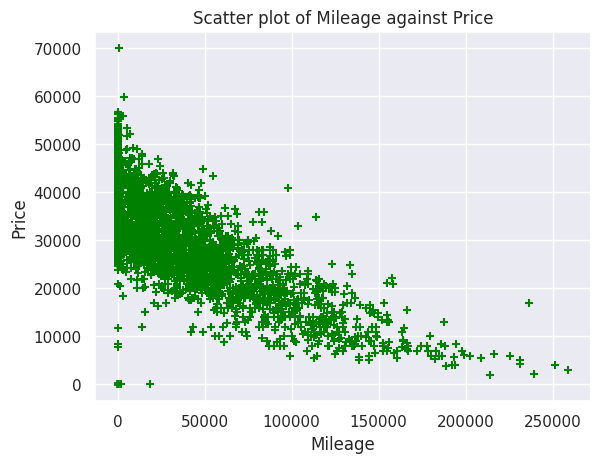

In [ ]:
plt.scatter(df['Mileage'], df['Price'], marker = '+', color='green')
plt.title('Scatter plot of Mileage against Price')
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

High concentration of sales in the 20,000 to 50,0000 in Price and less than 50000 mileage zone

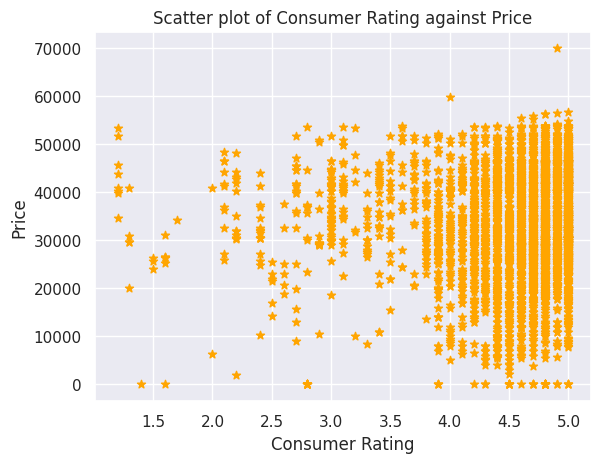

In [ ]:
plt.scatter(df['Consumer_Rating'], df['Price'],marker='*', color='orange')
plt.title('Scatter plot of Consumer Rating against Price')
plt.ylabel('Price')
plt.xlabel('Consumer Rating')
plt.show()

High concentration in the 4.5 to 5 zone 

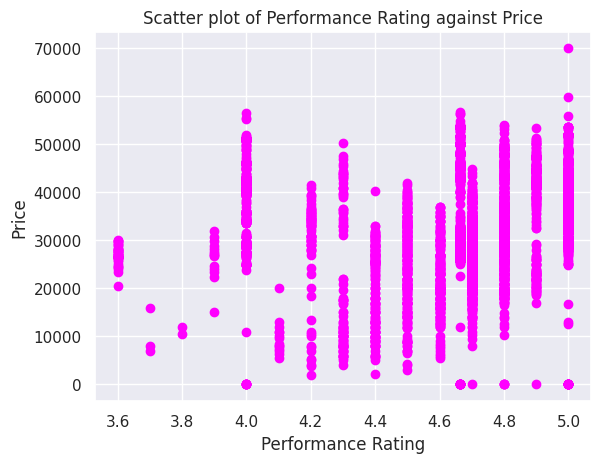

In [ ]:
plt.scatter(df['Performance_Rating'], df['Price'], marker='o', color='magenta')
plt.title('Scatter plot of Performance Rating against Price')
plt.ylabel('Price')
plt.xlabel('Performance Rating')
plt.show()

The Performance rating for mostly car sold is beyond 4.0 which is not that bad

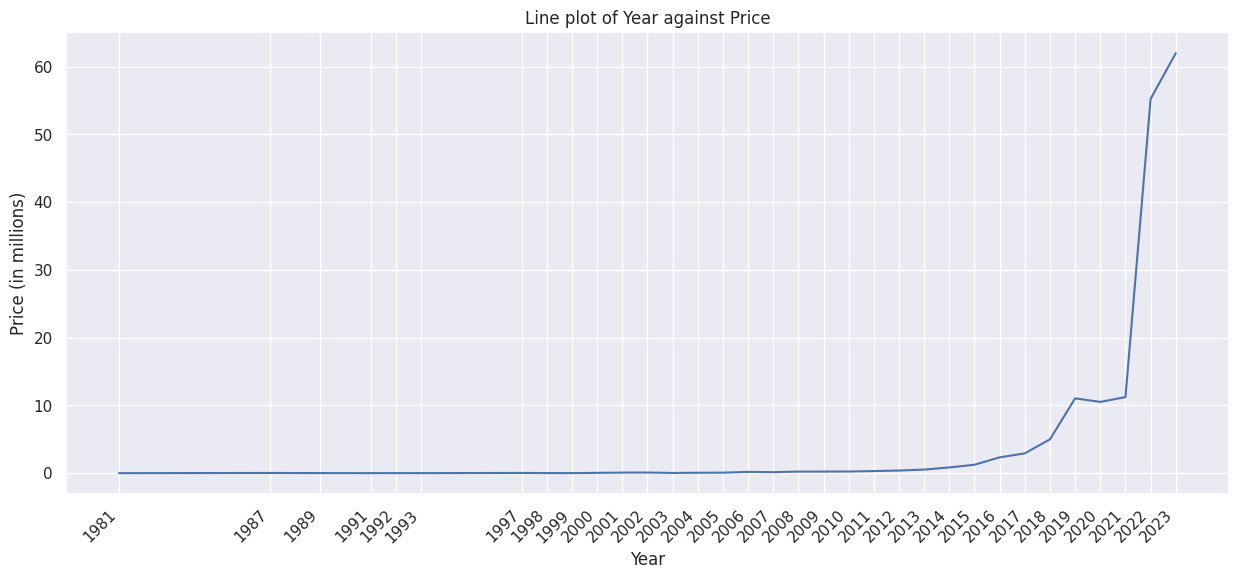

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
x = df.groupby('Year')['Price'].sum().index
y = df.groupby('Year')['Price'].sum().values / 1000000

ax.plot(x, y)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_title('Line plot of Year against Price')
ax.set_ylabel('Price (in millions)')
ax.set_xlabel('Year')
plt.show()

There is a huge sales increase annually especially in recent years

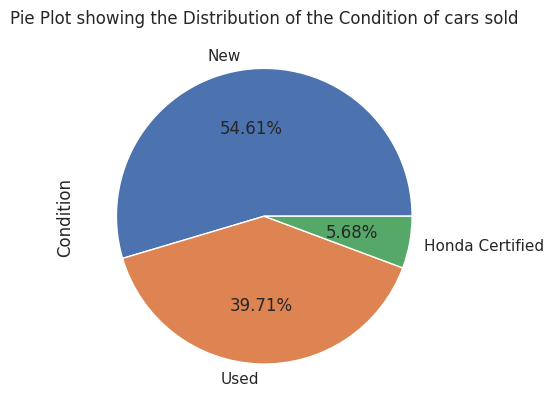

In [ ]:
df['Condition'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Pie Plot showing the Distribution of the Condition of cars sold')
plt.show()

The New cars sold contributed to 54.61% of all cars sold while used cars sales contributed to 39.71% and Honda Certified cars contributed to only 5.68% of all cars sales

<Axes: >

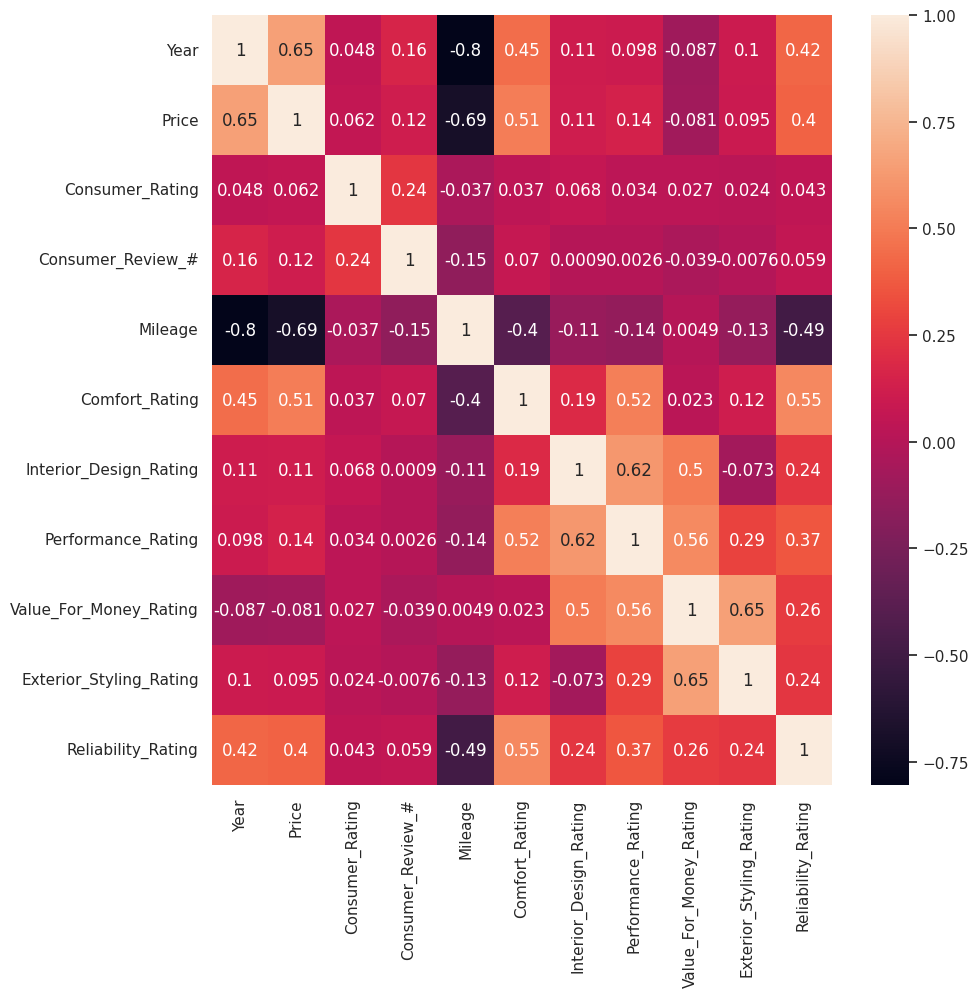

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

The correction between various columns are as shown above

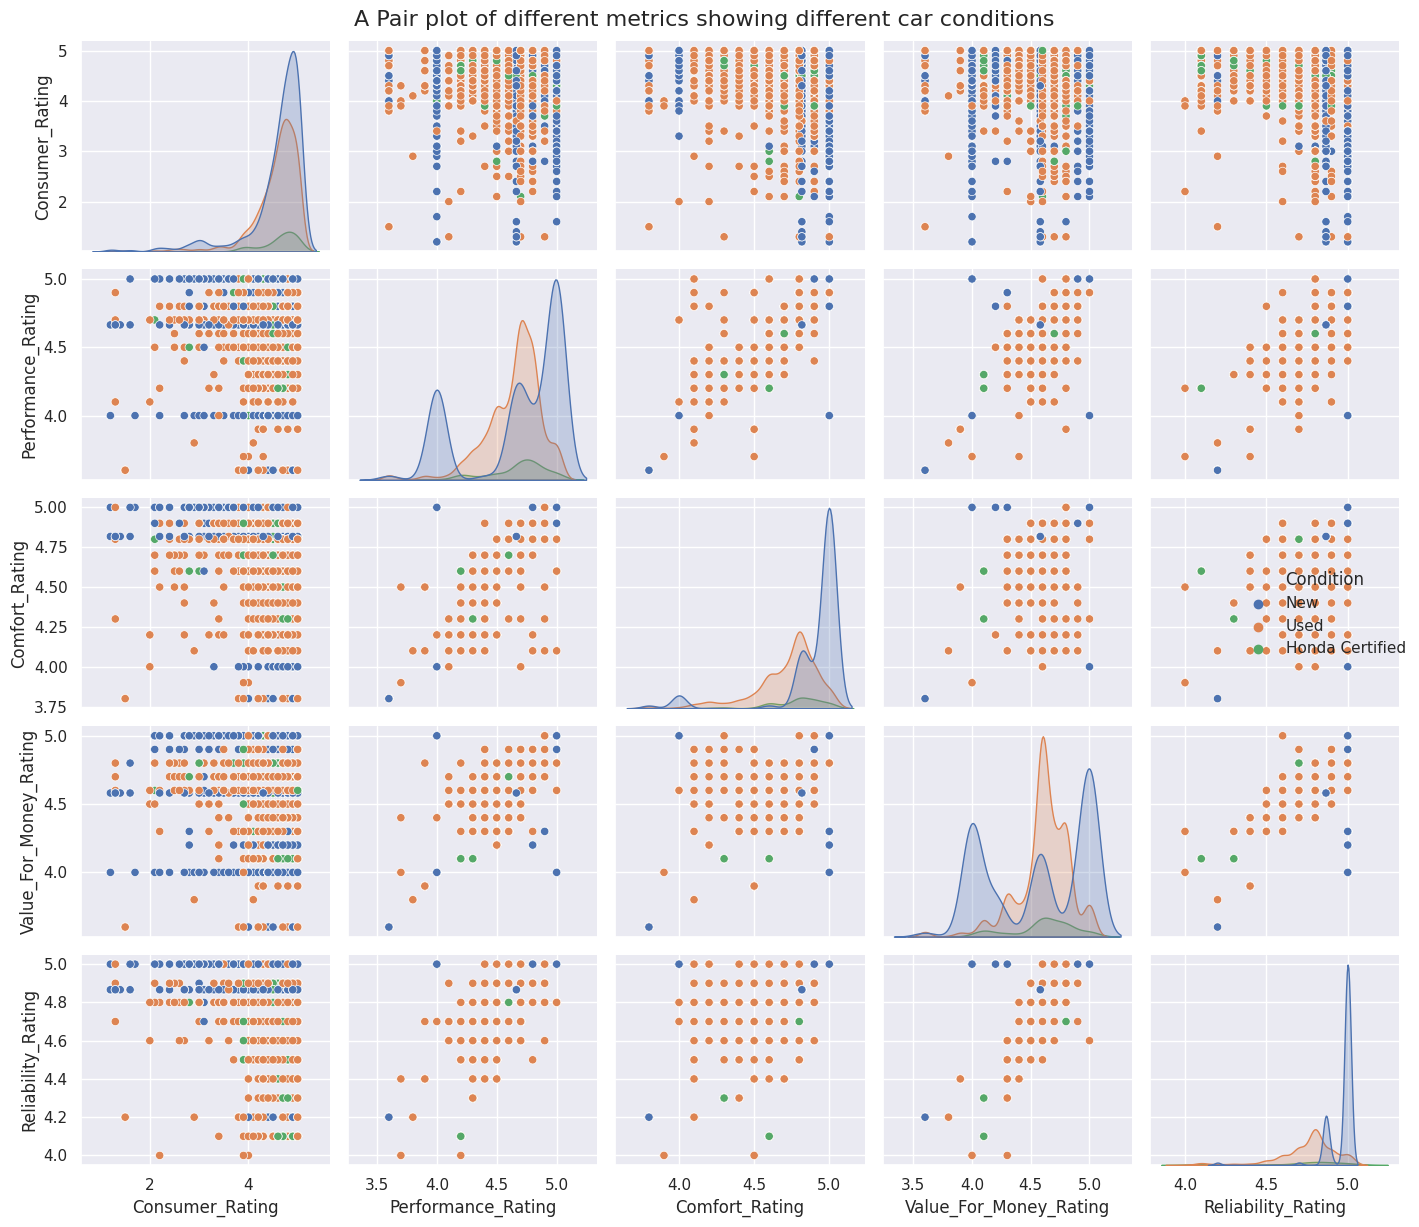

In [ ]:
sns.pairplot(df[['Condition', 'Consumer_Rating','Performance_Rating','Comfort_Rating','Value_For_Money_Rating','Reliability_Rating']], hue='Condition')
plt.suptitle('A Pair plot of different metrics showing different car conditions', fontsize=16)
plt.tight_layout() 
plt.show()

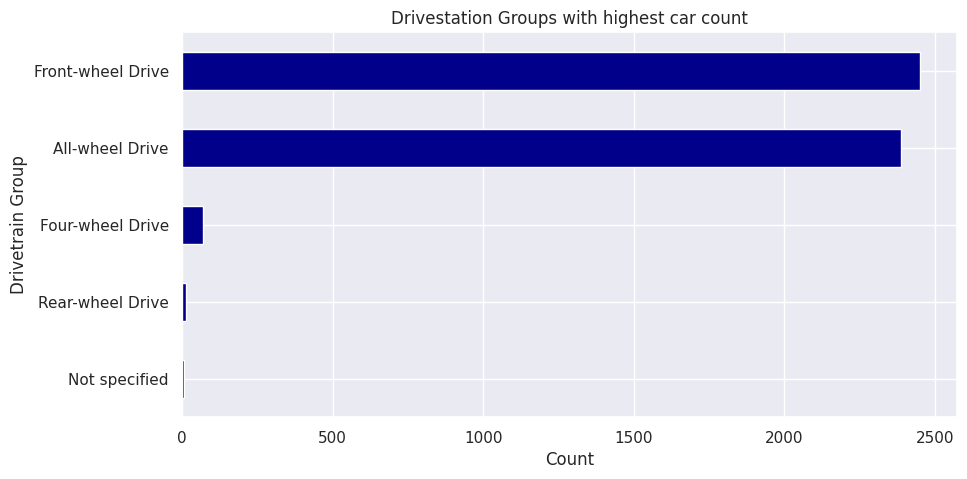

In [ ]:
data = df.groupby('Drivetrain_Group')['Price'].count().sort_values(ascending=False)

fig,ax = plt.subplots(figsize=(10,5))
ax = data.plot(kind='barh', color='darkblue')
ax.invert_yaxis() 

ax.set_title('Drivestation Groups with highest car count')
ax.set_xlabel('Count')
ax.set_ylabel('Drivetrain Group')

plt.show()

Front-wheel Drive contributed the most in sales, followed by the All-wheel Drive

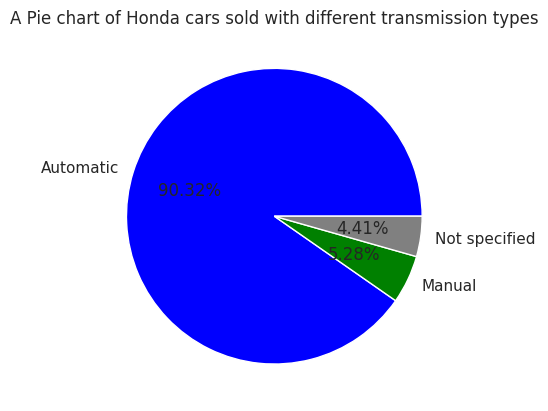

In [ ]:
transmission_counts = df['Transmission_Group'].value_counts()
labels = ['Automatic', 'Manual', 'Not specified']
colors = ['blue', 'green', 'gray']

plt.pie(transmission_counts, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('A Pie chart of Honda cars sold with different transmission types')
plt.show()

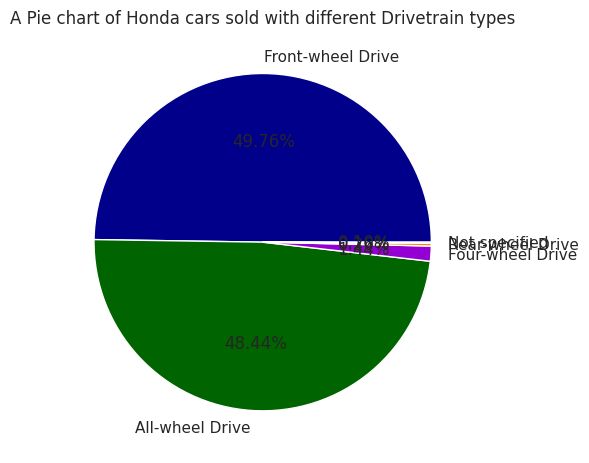

In [ ]:
drivetrain_counts = df['Drivetrain_Group'].value_counts()
labels = ['Front-wheel Drive', 'All-wheel Drive','Four-wheel Drive','Rear-wheel Drive', 'Not specified']
colors = ['darkblue', 'darkgreen', 'darkviolet','darkorange','darkmagenta']
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

plt.pie(drivetrain_counts, labels=labels, colors=colors, autopct='%1.2f%%', wedgeprops=wedgeprops)
plt.title('A Pie chart of Honda cars sold with different Drivetrain types')
plt.tight_layout()
plt.show()

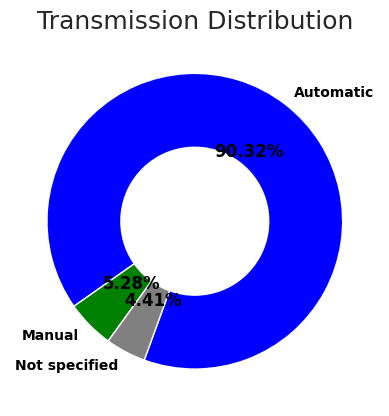

In [ ]:
transmission_counts = df['Transmission_Group'].value_counts()
labels = ['Automatic', 'Manual', 'Not specified']
colors = ['blue', 'green', 'gray']

# create figure and axis
fig, ax = plt.subplots()

# create outer circle
_, _, autotexts = ax.pie(
    transmission_counts, 
    labels=labels, 
    colors=colors, 
    wedgeprops={'width': 0.5},
    autopct=lambda pct: '{:.2f}%'.format(pct),
    textprops=dict(color="black", weight="bold", size=10),
    startangle=250,
)

# create inner circle
circle = plt.Circle((0,0), 0.35, color='white')
fig.gca().add_artist(circle)

# set text properties
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(12)

# add title
ax.set_title('Transmission Distribution', fontsize=18)

# show plot
plt.show()

The Automatic Transmission system cars sold the most with 90.32% of all sales followed by Manual Transmission system cars which only contrinuted to 5.28% of all sales

# REPORT AND FINDINGS

1. Total sales was over 165 Million USD after selling 4926 cars

2. Best and most selling Years

               Year          Total Sales                  Number of sales

               2023              62M                           1582

               2022              55M                           1458

               2021              11M                           336

               2020              10M                           349

               2019              11M                           392 

3. The most expensive car sold was Civic Type R Limited Edition(Used condition), sold at 70K USD in Florida state (FL). 

4. Top five Models that generated most sales
   
              Model                                  Total Sales(USD)

              Pilot Sport                             90M

              CR-V EX-L                               86M

              CR-V Hybrid Sport Touring               74M

              Pilot Trail Sport                       69M

              Pilot EX-L                              69M 


5. Top 5 Models that sold the most 

              Model                                    Number of sales

              CR-V EX-L                                261

              Pilot Sport                              228

              Pilot EX-L                               200

              Accord Sport 1.5T                        194

              CR-V Hybrid Sport Touring                185


5. Top 5 States with the Most sales

            State                               Number of sales

            CALIFORNIA (CA)                      330

            ILLINOIS (IL)                        329

            FLORIDA (FL)                         323

            TEXAS (TX)                           295

            OHIO (OH)                            268


6. Gross sales generated per new car sold was 39,178 USD
   
   Gross sales generated per used car sold was 38,748 USD

   Gross sales generated by Honda certified car sold was 44,430 USD


7. Automatic Transmission system cars generated the most sales with 151M USD selling 4449 cars while Manual Transmission system generated only 6M USD selling 217 cars   

8. Top 10 Most sold Model in each State

        State                     Model                        Number of sales

        ILLINOIS(IL)              Accord Sport 1.5T                   23

        CALIFORNIA(CA)            Pilot Sport                         20

        OHIO(OH)                  CR-V EX-L                           20

        FLORIDA(FL)               Civic Si Base                       19

        CALIFORNIA(CA)            CR-V EX-L                           18

        ILLINOIS(IL)              Pilot Sport                         17
                                  Pilot EX-L                          17

        CALIFORNIA(CA)            Pilot EX-L                          16
        
        ILLINOIS(IL)              Civic Sport                         16
                                  Pilot TrailSport                    16


9. The Civic Hybrid Base w/Leather (CVT) model sold in 2013 has the lowest rating of 2.9 and upon further investigation on the model, it seemed that the model was sold as a used car so probably it has a lot of defects that led to its lowest rating 

10. The top five best Models rated by consumers based on their Exterior colors
      
        Model	                        Exterior_Color			

        Passport TrailSport	          Sonic Gray Pearl	

        Odyssey EX-L	                Platinum White Pearl

        Accord Hybrid Sport	          Still Night Pearl	

        Accord Sport 2.0T	            Platinum White Pearl	

        Ridgeline RTL	                Crystal Black Pearl


11. Top five best rated Value for Money Models 

        Model			

        Accord Sport 1.5T	

        Accord Sport SE	

        Accord Sport 2.0T	

        Pilot Sport	

        Pilot Special Edition 



12. Top five best rated Reliable Models

          Model	

          CR-V Hybrid Sport	

          CR-V Hybrid Sport Touring	

          Odyssey Sport

          Accord Hybrid Sport

          Pilot Sport


13. Top five best rated Comfortable Models
        Model

        CR-V Hybrid Sport Touring	

        CR-V Hybrid Sport	

        Odyssey Sport	

        Pilot Special Edition	

        Accord Sport 1.5T


        

### Follow the link below to view the Interacting Dashboard made in Power BI 

Please click [here](https://app.powerbi.com/groups/me/reports/019321bb-0f53-4329-80c7-3e9084c7c78a/ReportSection)

Follow the link below to view the Interactive Dashboard made in Tableau

Please click [here](https://public.tableau.com/app/profile/dominic.william.mahamba/viz/HondaCarSalesDashboard/Dashboard1)